In [1]:
def Cào_dữ_liệu_from_website(url):
    #import libraries:
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    import csv
    #main:
    page = requests.get(url).text
    #now, page = whole HTML file: is a string!
    #Create a BeautifulSoup object:
    soup = BeautifulSoup(page, 'html.parser')
    
    #Pulls all instances of <a> tag:
    artists = soup.find_all('a')
    #Clear data of all tags:
    for artist in artists:
        names = artist.contents
        fullLink = artist.get('href')
        #print(names)
        #print(fullLink)
        
        
        
    #Below are examples shown data with DataFrame
    #columns --> dataFrame
    columns = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
    pd.DataFrame.from_dict(columns)
    #rows --> dataFrame
    rows = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
    pd.DataFrame.from_dict(rows, orient='index') #có thể thêm parameter: columns=['A', 'B', 'C', 'D'])
    
    #Below is an example of crawling TABLE from the website: https://giavang.org/
    #import libraries:
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    import csv
    #main:
    page_1 = requests.get('https://giavang.org/').text
    #now, page = whole HTML file: is a string!
    #Create a BeautifulSoup object:
    soup_1 = BeautifulSoup(page_1, 'html.parser')
    
    #Pulls all instances of <a> tag:
    table_1 = soup_1.find('table')
    headers=[]
    for k in table_1.find_all('th'): #columns
        #print(k.text)
        headers.append(k.text)
    print('headers: ',headers)
    headers = headers[1:4]
    values = []
    for k in table_1.find_all('td'): #values
        values.append(k.text)
    columns_values = {}
    for k in range(len(headers)):
        columns_values[k] = []
    for k in range(int(len(values)/len(headers))):
        for j in range(len(headers)):
            columns_values[j].append(values[len(headers)*k+j])    
    columns_values
    #columns --> dataFrame
    columns = {headers[0]: columns_values[0], headers[1]: columns_values[1],headers[2]:columns_values[2]}
    pd.DataFrame.from_dict(columns)
    
    
    
    #return page:
    return page,soup

In [75]:
u = 'https://www.pnj.com.vn/blog/gia-vang/'
page,soup = Cào_dữ_liệu_from_website(u)

headers:  ['Khu vực', 'Hệ thống', 'Mua vào', 'Bán ra', 'TP. Hồ Chí Minh', 'Hà Nội', 'Đà Nẵng', 'Nha Trang', 'Cà Mau', 'Huế', 'Bình Phước', 'Biên Hòa', 'Miền Tây', 'Quảng Ngãi', 'Long Xuyên', 'Bạc Liêu', 'Quy Nhơn', 'Phan Rang', 'Hạ Long', 'Quảng Nam', 'Miền Tây', 'Bến Tre', 'Tiền Giang']


In [76]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
soup = BeautifulSoup(page, 'html.parser')
    
tbl = soup.find('table')

In [79]:
a = tbl.find_all('td')
b = tbl.find_all('th')

In [80]:
for k in a:
    print(k.text)
for k in b:
    print(k.text)

Vàng miếng SJC (999.9)

6,590


6,690

Nhẫn Trơn PNJ (999.9)

5,180


5,280

Vàng Kim Bảo 999.9

5,180


5,280

Vàng Phúc Lộc Tài 999.9

5,180


5,290

Vàng 24K (999.9)

5,130


5,210

Vàng 750 (18K)

3,783


3,923

Vàng 585 (14K)

2,923


3,063

Vàng 416 (10K)

2,042


2,182

Vàng miếng PNJ (999.9)

5,180


5,290

Vàng 916 (22K)

4,732


4,782

Vàng 680 (16.3K)

3,418


3,558

Vàng 650 (15.6K)

3,262


3,402

Loại vàng | ĐVT: 1.000đ/Chỉ
Giá mua
Giá bán


In [81]:
number_of_cols = 3
headers = [k.text for k in b]
headers

['Loại vàng | ĐVT: 1.000đ/Chỉ', 'Giá mua', 'Giá bán']

In [84]:
values = {}
for k in range(len(headers)):
    values[k] = []
for k in range(int(len(a)/number_of_cols)):
    for j in (values):
        values[j].append(a[k*number_of_cols + j].text.strip())
values

{0: ['Vàng miếng SJC (999.9)',
  'Nhẫn Trơn PNJ (999.9)',
  'Vàng Kim Bảo 999.9',
  'Vàng Phúc Lộc Tài 999.9',
  'Vàng 24K (999.9)',
  'Vàng 750 (18K)',
  'Vàng 585 (14K)',
  'Vàng 416 (10K)',
  'Vàng miếng PNJ (999.9)',
  'Vàng 916 (22K)',
  'Vàng 680 (16.3K)',
  'Vàng 650 (15.6K)'],
 1: ['6,590',
  '5,180',
  '5,180',
  '5,180',
  '5,130',
  '3,783',
  '2,923',
  '2,042',
  '5,180',
  '4,732',
  '3,418',
  '3,262'],
 2: ['6,690',
  '5,280',
  '5,280',
  '5,290',
  '5,210',
  '3,923',
  '3,063',
  '2,182',
  '5,290',
  '4,782',
  '3,558',
  '3,402']}

In [85]:
#columns --> dataFrame
columns = {}
for k in range(len(headers)):
    columns[headers[k]] = values[k]
pd.DataFrame.from_dict(columns)

,Loại vàng | ĐVT: 1.000đ/Chỉ,Giá mua,Giá bán
0,Vàng miếng SJC (999.9),"6,590","6,690"
1,Nhẫn Trơn PNJ (999.9),"5,180","5,280"
2,Vàng Kim Bảo 999.9,"5,180","5,280"
3,Vàng Phúc Lộc Tài 999.9,"5,180","5,290"
4,Vàng 24K (999.9),"5,130","5,210"
5,Vàng 750 (18K),"3,783","3,923"
6,Vàng 585 (14K),"2,923","3,063"
7,Vàng 416 (10K),"2,042","2,182"
8,Vàng miếng PNJ (999.9),"5,180","5,290"
9,Vàng 916 (22K),"4,732","4,782"


In [68]:
mean_score_values = {}
for k in columns[headers[1]]:
    mean_score_values[k] = []
for k in range(len(columns[headers[1]])):
    score = ''
    count = 0
    for x in columns[headers[2]][k]:
        count += 1
        if x == '(':
            mean_score_values[columns[headers[1]][k]] = score
            break
        elif count == len(columns[headers[2]][k]):
            score += x
            mean_score_values[columns[headers[1]][k]] = score
            break
        else:
            score += x
mean_score_values

{'Đại học Nha Trang': '15,5-21',
 'Đại học Công nghệ TP HCM': '17-21',
 'Đại học Kinh tế - Tài chính TP HCM': '17-20',
 'Đại học Khoa học Xã hội và Nhân văn (Đại học Quốc gia Hà Nội)': '20-29,95',
 'Đại học Thuỷ lợi': '17-26,6',
 'Đại học Cảnh sát nhân dân': '18,14-24,43 ',
 'Học viện Ngân hàng': '24-28,05',
 'Đại học Điều dưỡng Nam Định': '19-19,5',
 'Đại học Y Dược (Đại học Quốc gia Hà Nội)': '24,25-27,3',
 'Khoa Các khoa học liên ngành (Đại học Quốc gia Hà Nội)': '23,9-26,76',
 'Đại học Công nghệ (Đại học Quốc gia Hà Nội)': '22-29,15',
 'Trường Kinh tế (Đại học Quốc gia Hà Nội)': '33,05-35,33 ',
 'Trường Quản trị và Kinh doanh (Đại học Quốc gia Hà Nội)': '20,05-22,05',
 'Khoa Luật (Đại học Quốc gia Hà Nội)': '22,62-28,25',
 'Đại học Khoa học Tự nhiên (Đại học Quốc gia Hà Nội)': '20-26,45',
 'Đại học Thương mại': '25,8-27',
 'Đại học Kinh tế quốc dân': '26,1-28,6 ',
 'Đại học Việt Nhật (Đại học Quốc gia Hà Nội)': '20-21,5',
 'Trường Quốc tế (Đại học Quốc gia Hà Nội': '20-24',
 'Đại h

In [70]:
#get average of scores:
name = []
scores = []
for k in mean_score_values:
    name.append(k)
    score = [float(sc.strip().replace(',','.')) for sc in mean_score_values[k].strip().split('-')]
    scores.append(sum(score)/len(score))
scores

[18.25,
 19.0,
 18.5,
 24.975,
 21.8,
 21.285,
 26.025,
 19.25,
 25.775,
 25.33,
 25.575,
 34.19,
 21.05,
 25.435000000000002,
 23.225,
 26.4,
 27.35,
 20.75,
 22.0,
 22.6,
 31.715,
 24.65,
 65.295,
 20.0,
 24.475,
 27.7,
 25.675,
 23.955,
 23.3,
 25.66,
 22.8,
 22.65,
 22.4,
 27.2,
 21.9,
 17.0,
 22.875,
 19.0,
 19.0,
 19.5,
 17.5,
 19.0,
 20.5,
 16.0,
 21.2,
 19.0,
 19.0,
 17.125,
 18.5,
 16.0,
 22.625,
 19.75,
 27.125,
 25.475,
 21.625,
 21.125,
 20.7,
 22.375,
 18.25,
 20.125,
 24.25,
 20.38,
 25.0,
 20.79,
 20.825,
 24.75,
 20.625,
 20.72,
 19.82,
 22.525,
 18.5,
 19.0,
 22.4,
 23.875,
 22.2,
 24.5,
 22.9,
 24.625,
 18.5,
 26.305,
 22.305,
 19.55,
 21.244999999999997,
 20.355,
 19.0,
 20.65,
 25.925,
 25.75,
 23.725,
 24.275,
 24.55,
 24.200000000000003,
 25.3,
 22.25,
 22.45,
 22.075,
 20.85,
 18.8,
 21.325,
 22.075,
 26.275,
 21.39,
 21.875,
 19.25,
 33.370000000000005,
 24.125,
 23.575,
 22.33,
 17.5,
 17.0,
 17.5,
 22.0,
 22.875,
 17.0,
 17.5,
 20.2,
 15.0,
 18.35,
 24.14,
 23

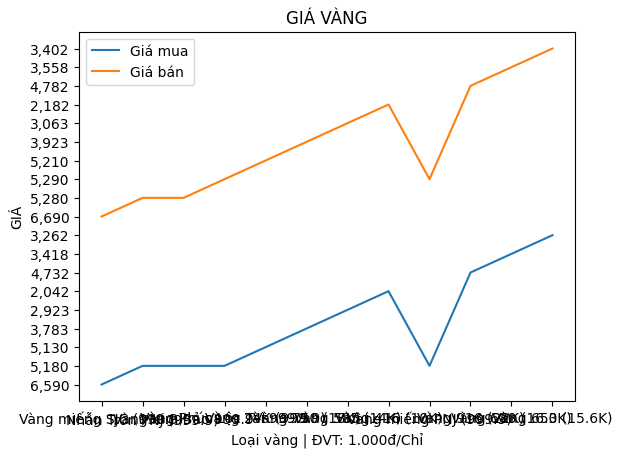

In [89]:
# TRỰC QUAN HÓA BẰNG BIỂU ĐỒ
if 1==1:
    import matplotlib.pyplot as plt
    # Plot
    plt.plot(columns[headers[0]],columns[headers[1]],label = headers[1])
    plt.plot(columns[headers[0]],columns[headers[2]], label = headers[2])
    plt.title('GIÁ VÀNG')
    plt.xlabel(headers[0])
    plt.ylabel('GIÁ')
    plt.legend(loc='best')
    plt.show()